## Project 9

A data analysis on professional men's and womens tennis stats in 2009 and in 2023. This will be a comparitave and general analysis, aiming to find any patterns in the most successful players. 

Data published by: https://github.com/JeffSackmann
Accessed December 4, 2023.

Link to Github Repository:



In [44]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [45]:
# loading csv files

stats_2023 = pd.read_csv('atp_matches_2023.csv')
stats_2009 = pd.read_csv('atp_matches_2009.csv')

In [46]:
# take a peek...

stats_2023.head()


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0


In [47]:

stats_2009.head()


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2009-1536,Madrid Masters,Clay,56,M,20090510,1,103781,NaN,NaN,...,51.0,35.0,26.0,15.0,3.0,6.0,27.0,1735.0,28.0,1724.0
1,2009-1536,Madrid Masters,Clay,56,M,20090510,2,104259,NaN,NaN,...,36.0,29.0,13.0,9.0,7.0,9.0,35.0,1510.0,34.0,1515.0
2,2009-1536,Madrid Masters,Clay,56,M,20090510,3,105227,13.0,NaN,...,45.0,26.0,21.0,13.0,5.0,10.0,14.0,2635.0,90.0,835.0
3,2009-1536,Madrid Masters,Clay,56,M,20090510,4,103970,12.0,NaN,...,26.0,14.0,18.0,8.0,7.0,12.0,13.0,2645.0,108.0,734.0
4,2009-1536,Madrid Masters,Clay,56,M,20090510,5,104338,NaN,WC,...,44.0,31.0,25.0,11.0,12.0,14.0,47.0,1240.0,32.0,1620.0


In [50]:
# displaying columns
column_names = stats_2023.columns.tolist()
print(column_names)

['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']


QUESTION: Which player won the most matches in 2023?

In [85]:
# which player had the most amount of match wins in 2023?
win_counts = stats_2023['winner_name'].value_counts()

most_wins_player = win_counts.idxmax()
most_wins_count = win_counts.max()

print(most_wins_player)

Daniil Medvedev


Cool! Go Medvedev! 

QUESTION: Which players were playing in the final round of every tournament in 2023? 

In [86]:
# Filter the DataFrame to include only final rounds
final_rounds_df = stats_2023[stats_2023['round'] == 'F']

# Create a new DataFrame with only the columns 'tourney_name', 'winner_name', and 'loser_name'
final_results_df = final_rounds_df[['tourney_name', 'winner_name', 'loser_name']]

# Access the winner and loser names in each final round
for index, row in final_results_df.iterrows():
    tourney_name = row['tourney_name']
    winner_name = row['winner_name']
    loser_name = row['loser_name']
    
    # Print
    print(f"Tournament: {tourney_name}, Winner: {winner_name}, Loser: {loser_name}")

Tournament: United Cup, Winner: Taylor Fritz, Loser: Matteo Berrettini
Tournament: United Cup, Winner: Frances Tiafoe, Loser: Lorenzo Musetti
Tournament: Adelaide 1, Winner: Novak Djokovic, Loser: Sebastian Korda
Tournament: Pune, Winner: Tallon Griekspoor, Loser: Benjamin Bonzi
Tournament: Auckland, Winner: Richard Gasquet, Loser: Cameron Norrie
Tournament: Adelaide 2, Winner: Soon Woo Kwon, Loser: Roberto Bautista Agut
Tournament: Australian Open, Winner: Novak Djokovic, Loser: Stefanos Tsitsipas
Tournament: Cordoba, Winner: Sebastian Baez, Loser: Federico Coria
Tournament: Dallas, Winner: Yibing Wu, Loser: John Isner
Tournament: Montpellier, Winner: Jannik Sinner, Loser: Maxime Cressy
Tournament: Delray Beach, Winner: Taylor Fritz, Loser: Miomir Kecmanovic
Tournament: Buenos Aires, Winner: Carlos Alcaraz, Loser: Cameron Norrie
Tournament: Rotterdam, Winner: Daniil Medvedev, Loser: Jannik Sinner
Tournament: Doha, Winner: Daniil Medvedev, Loser: Andy Murray
Tournament: Rio De Janeiro,

Visualization of the payers who made it to the final rounds but only those who won at least 3 finals:

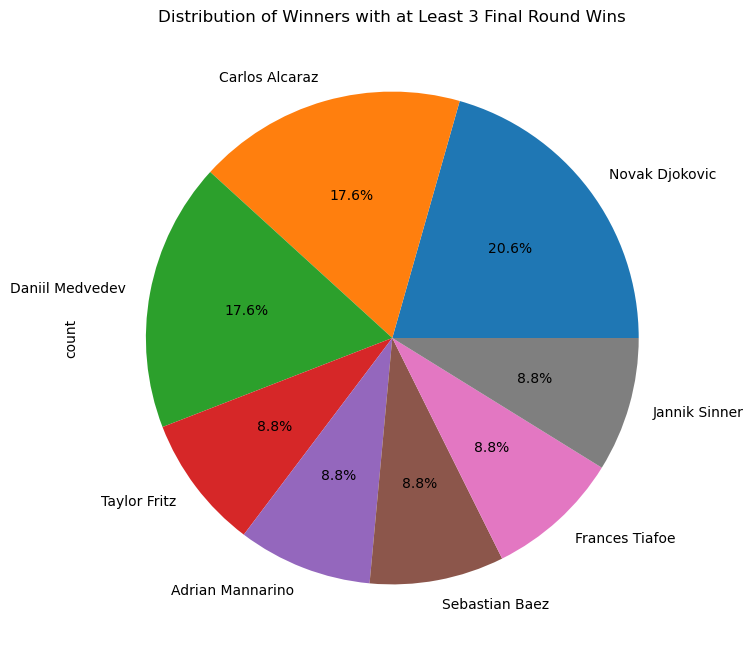

In [87]:
# Count final rounds won by each player
winner_counts = final_results_df['winner_name'].value_counts()

# Filter the players who have won at least 3 final rounds
winners_with_at_least_3_wins = winner_counts[winner_counts >= 3]

# Plot
plt.figure(figsize=(8, 8))
winners_with_at_least_3_wins.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Winners with at Least 3 Final Round Wins')
plt.show()

Based on this pie chart it look the Novak Djokovic won the most amount of final rounds--an astounding 20% of all final rounds played this year. Right behind him are Carlos Alcaraz and Daniil Madvedev who tied, winning 17.6% of all final rounds. 

QUESTION: what percentage of final rounds did Djoker win out all all he played?  

In [84]:
# Filter the DataFrame to get only Novak Djokovic's matches
djokovic_matches = stats_2023[(stats_2023['winner_name'] == 'Novak Djokovic') | (stats_2023['loser_name'] == 'Novak Djokovic')]

# Count the total number of final rounds played by Novak Djokovic
djokovic_finals = djokovic_matches[djokovic_matches['round'] == 'F']
total_final_rounds_played = len(djokovic_finals)

# Count the number of final rounds won by Novak Djokovic
total_final_rounds_won = final_results_df['winner_name'].value_counts().get('Novak Djokovic', 0)  # 0 if not found in the filtered winners

# Calculate the win percentage
win_percentage = (total_final_rounds_won / total_final_rounds_played) * 100

print(f"Novak Djokovic played a total of {total_final_rounds_played} finals, winninng {total_final_rounds_won} of them, ending the 2023 season with a {win_percentage}% win percentage.")

Novak Djokovic played a total of 8 finals, winninng 7 of them, ending the 2023 season with a 87.5% win percentage.


Wow! He's really good! What about Carlos?

In [89]:
# Filter the DataFrame to get only Carlos Alcaraz's matches
alcaraz_matches = stats_2023[(stats_2023['winner_name'] == 'Carlos Alcaraz') | (stats_2023['loser_name'] == 'Carlos Alcaraz')]

# Count the total number of final rounds played by Carlos Alcaraz
alcaraz_finals = alcaraz_matches[alcaraz_matches['round'] == 'F']
total_final_rounds_played = len(alcaraz_finals)

# Count the number of final rounds won by Carlos Alcaraz
total_final_rounds_won = final_results_df['winner_name'].value_counts().get('Carlos Alcaraz', 0)  # 0 if not found in the filtered winners

# Calculate the win percentage
win_percentage = (total_final_rounds_won / total_final_rounds_played) * 100

print(f"Carlos Alcaraz played a total of {total_final_rounds_played} finals, winning {total_final_rounds_won} of them, ending the 2023 season with a {win_percentage}% win percentage.")

Carlos Alcaraz played a total of 8 finals, winning 6 of them, ending the 2023 season with a 75.0% win percentage.


Now I want to take a look at the distribution of seeds among the top players. 

In [90]:
# Concatenate the 'winner_seed' and 'loser_seed' columns to get all seed values
all_seeds = pd.concat([stats_2023['winner_seed'], stats_2023['loser_seed']], ignore_index=True)
all_seeds.head()


0    3.0
1    NaN
2    3.0
3    NaN
4    1.0
dtype: float64

It seems like there are some missing values here. I might have to change the type to account for these.

In [34]:
# Convert seed values to float, handling missing values
all_seeds = all_seeds.astype(float)

# Remove missing values
all_seeds = all_seeds[~all_seeds.isna()]

# Count the occurrences of each seed
seed_counts = all_seeds.value_counts()

# Find the seed number with the highest count
most_common_seed = seed_counts.idxmax()

# Find the player(s) associated with the most common seed
players_with_most_common_seed = stats_2023[stats_2023['winner_seed'] == most_common_seed]['winner_name'].mode()

# Print the result
print(f"Seed with the most occurrences: {most_common_seed}")
print(f"Player(s) associated with the most common seed: {players_with_most_common_seed.tolist()}")

Seed with the most occurrences: 1.0
Player(s) associated with the most common seed: ['Carlos Alcaraz']


In [35]:
# Filter for matches where Novak Djokovic was the winner and seeded number 1
novak_seed1_wins = stats_2023[(stats_2023['winner_name'] == 'Novak Djokovic') & (stats_2023['winner_seed'] == 1)]

# Filter for matches where Novak Djokovic was the loser and seeded number 1
novak_seed1_losses = stats_2023[(stats_2023['loser_name'] == 'Novak Djokovic') & (stats_2023['loser_seed'] == 1)]

# Concatenate the two DataFrames to get all matches where Novak Djokovic was seeded number 1
novak_seed1_matches = pd.concat([novak_seed1_wins, novak_seed1_losses])

# Count the number of occurrences
novak_seed1_count = len(novak_seed1_matches)

# Print the result
print(f"Novak Djokovic was seeded number 1 {novak_seed1_count} times.")


Novak Djokovic was seeded number 1 27 times.


In [37]:
# Filter for matches where Carlos Alcaraz was the winner and seeded number 1
alcaraz_seed1_wins = stats_2023[(stats_2023['winner_name'] == 'Carlos Alcaraz') & (stats_2023['winner_seed'] == 1)]

# Filter for matches where Carlos Alcaraz was the loser and seeded number 1
alcaraz_seed1_losses = stats_2023[(stats_2023['loser_name'] == 'Carlos Alcaraz') & (stats_2023['loser_seed'] == 1)]

# Concatenate the two DataFrames to get all matches where Carlos Alcaraz was seeded number 1
alcaraz_seed1_matches = pd.concat([alcaraz_seed1_wins, alcaraz_seed1_losses])

# Count the number of occurrences
alcaraz_seed1_count = len(alcaraz_seed1_matches)

# Print the result
print(f"Carlos Alcaraz was seeded number 1 {alcaraz_seed1_count} times.")

Carlos Alcaraz was seeded number 1 70 times.


Wow! That's a lot!